# Environment Testing

In [1]:
from gridworld_ctf_mvp import GridworldCtf
import numpy as np

In [2]:
# create env
config = {
            'GRID_SIZE':7,
            'RANDOMISE_FLAG_POSITIONS':False,
            'AGENT_CONFIG':{
                0: {'team':0, 'type':0},
                1: {'team':1, 'type':0},
                # 2: {'team':0, 'type':0},
                # 3: {'team':1, 'type':0},
            },
            'DROP_FLAG_WHEN_NO_HP': False,
            'ENABLE_OBSTACLES': False,
            'MAX_BLOCK_TILE_PCT': 0.1
        }


env = GridworldCtf(**config)

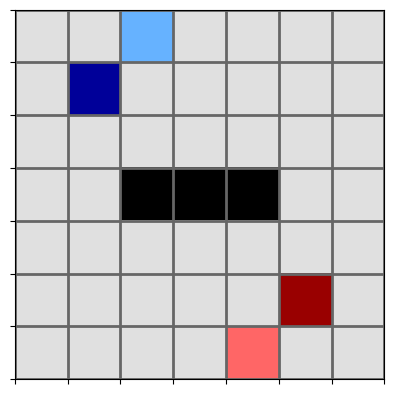

In [3]:
env.reset()
env.render()

In [4]:
env.standardise_state(0, use_ego_state=True)

array([[[[0, 0, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],


In [5]:
env.standardise_state(1, use_ego_state=False)

array([[[[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0]],

        [[0, 0, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0]]]], dtype=uint8)

In [6]:
env.standardise_state(1, use_ego_state=True).shape

(1, 5, 7, 7)

In [7]:
env.standardise_state(0, use_ego_state=False).shape

(1, 4, 7, 7)

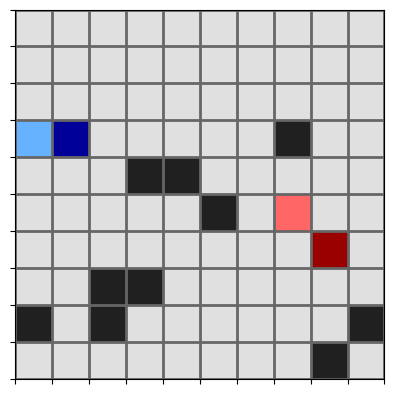

Move 0
Game exited


In [8]:
env.play()

In [8]:
idx = 2
print(env.standardise_state(0)[0, idx, :])
print()
print(env.standardise_state(0, reverse_grid=True)[0, idx, :])


[[0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0]]


In [15]:
%%timeit
env.get_env_metadata_local_old()

14.5 µs ± 123 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [16]:
%%timeit
env.get_env_metadata_local(0)

10.3 µs ± 13.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### PPO Testing

In [9]:
from ppo3_refactor import PPOTrainer
import torch
import torch.nn as nn
from torch.distributions.categorical import Categorical

In [10]:
class Agent(nn.Module):
    def __init__(self, n_channels, grid_size, metadata_size):
        super(Agent, self).__init__()
        self.n_channels = n_channels
        self.grid_size = grid_size
        self.metadata_size = metadata_size
        self.unrolled_conv_size = self.get_unrolled_conv_size()
        self.conv1 = nn.Conv2d(n_channels, 16, kernel_size=3, stride=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1)
        self.fc1 = nn.Linear(self.unrolled_conv_size + self.metadata_size, 256)
        self.action_head = nn.Linear(256, 4)
        self.value_head = nn.Linear(256, 1)

    def get_unrolled_conv_size(self):
        # Calculate number of dimensions for unrolled conv2 layer
        dim1 = self.grid_size - 3 + 1
        dim2 = dim1 - 3 + 1
        return 32 * dim2 * dim2

    def get_value(self, x, x2):
        x = torch.tanh(self.conv1(x))        
        x = torch.tanh(self.conv2(x))        
        x = x.view(-1, self.unrolled_conv_size)

        # Add in metadata
        x = torch.concat((x, x2), dim=1)

        x = torch.tanh(self.fc1(x))        
        return self.value_head(x)

    def get_action_and_value(self, x, x2, action=None):
        x = torch.tanh(self.conv1(x))        
        x = torch.tanh(self.conv2(x))        
        x = x.view(-1, self.unrolled_conv_size)

        # Add in metadata
        x = torch.concat((x, x2), dim=1)

        x = torch.tanh(self.fc1(x))        
        logits = self.action_head(x)

        probs = Categorical(logits=logits)
        if action is None:
            action = probs.sample()
        return action, probs.log_prob(action), probs.entropy(), self.value_head(x)

In [13]:
class TrainingConfig():
    def __init__(self):
        #---------- Overall config
        self.wandb_project_name = "MARL-CTF-Test"
        self.exp_name = "Agent metrics logging"
        self.use_wandb_selfplay = True
        self.use_wandb_ppo = False
        self.seed = 42

        #---------- Self-play config
        self.number_of_iterations = 50
        self.number_of_duels = 2
        self.n_main_agents = 10
        self.n_exploiters = 5
        self.n_historical_agents = 10
        self.main_agent_update_interval = 5
        self.exploiter_update_interval = 5
        self.historical_update_interval = 2
        self.max_win_rate_diff = 1.0

        #---------- Environment config
        self.use_ego_state = True
        self.env_config = {
            'GRID_SIZE':7,
            'AGENT_CONFIG':{
                0: {'team':0, 'type':0},
                1: {'team':1, 'type':0},
                2: {'team':0, 'type':1},
                3: {'team':1, 'type':1},
            },
            'GAME_STEPS': 256,
            'GLOBAL_REWARDS': False,
            'RANDOMISE_FLAG_POSITIONS':False,
            'HOME_FLAG_CAPTURE': True,
            'ENABLE_OBSTACLES': False,
            'MAX_BLOCK_TILE_PCT': 0.05
        }

        #---------- PPO Config
        self.learning_rate = 0.0003
        self.total_timesteps = 5000
        self.torch_deterministic = True
        self.cuda = True
        self.wandb_entity = None
        self.capture_video = False
        self.num_envs = 4
        self.parallel_rollouts = True
        self.num_agents = 1
        self.num_steps = 256
        self.anneal_lr = False
        self.gae = True
        self.gamma = 0.95
        self.gae_lambda = 0.96
        self.num_minibatches = 4
        self.update_epochs = 4
        self.norm_adv = False
        self.clip_coef = 0.2
        self.clip_vloss = True
        self.ent_coef = 0.01
        self.vf_coef = 0.5
        self.max_grad_norm = 0.5
        self.target_kl = None
        self.batch_size = int(self.num_envs * self.num_steps * self.num_agents)
        self.minibatch_size = int(self.batch_size // self.num_minibatches)
        self.device = 'cpu'

        #---------- Metrics config

args = TrainingConfig()

In [14]:
env = GridworldCtf(**args.env_config)

dims_data = env.get_env_dims()
local_grid_dims = dims_data[0]
global_grid_dims = dims_data[1]
local_metadata_dims = dims_data[2]
global_metadata_dims = dims_data[3]
n_channels = local_grid_dims[0]

#----------------------------------------------------------------------
# Initialise agent population
#----------------------------------------------------------------------
agent = Agent(n_channels, env.GRID_SIZE, local_metadata_dims[0]).to(args.device)
opponent = Agent(n_channels, env.GRID_SIZE, local_metadata_dims[0]).to(args.device)

# Setup PPO trainer
ppotrainer = PPOTrainer(args, local_grid_dims, local_metadata_dims)


ppotrainer.train_ppo(args, env, agent, opponent)

AttributeError: Can't pickle local object 'GridworldCtf.reset.<locals>.<lambda>'